# Moving-Average-Filter am Beispiel Corona-Inzidenz
Gezeigt werden die Tages-Neuinfektionen in Deutschland der letzten $N$ Tage ($N$ einstellbar), in den Rohwerten (blau) und mit einem Moving Average-Filter der Länge $M$ gefiltert ($M$ ebenfalls einstellbar).
Verändern Sie $M$:
- Was passiert bei $M=1$ und bei $M=2$?
- Bei welchen $M$ ist die Wochenzyklik minimal erkennbar?

*Basis: Corona-Fallzahlen in D, Quelle: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series*

Output()

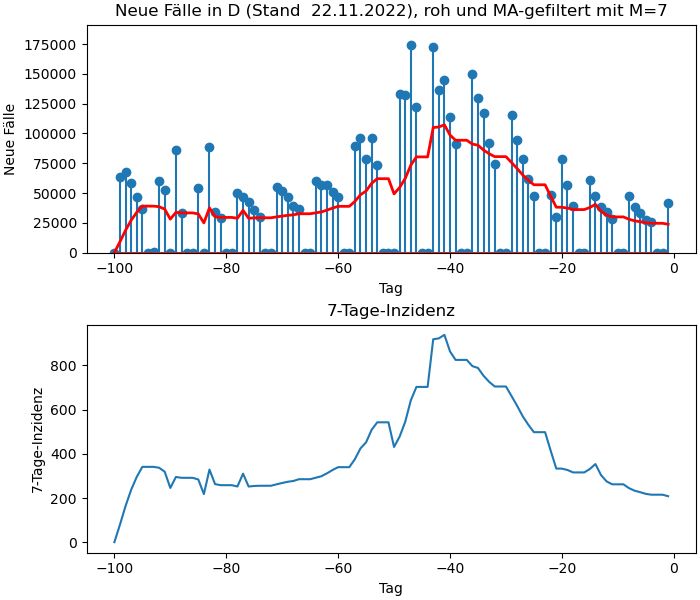

In [2]:
%matplotlib widget 
from numpy import (array, arange,  zeros, ones, diff) # numpy für's Rechnen, bei Bedarf anpassen
from scipy.signal import lfilter as filter
from matplotlib.pyplot import (figure, plot, stem, legend, text,  
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

figure(figsize=(7, 6), dpi=100, layout='constrained',num=' ') 

# Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
# 2022-11-22: ,Germany,51.165691,10.451526,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,21,26,53,66,117,150,188,240,349,534,684,847,1112,1296,1567,2369,3062,3795,4838,6012,7156,8198,10999,13957,16662,18610,22672,27436,31554,36508,42288,48582,52547,57298,61913,67366,73522,79696,85778,91714,95391,99225,103228,108202,113525,117658,120479,123016,125098,127584,130450,133830,137439,139897,141672,143457,145694,148046,150383,152438,154175,155193,156337,157641,159119,160758,161703,162496,163175,163860,164807,166091,167300,168551,169218,169575,170508,171306,172239,173152,173772,174355,174697,175210,176007,176752,177212,177850,178281,178570,179002,179364,179717,180458,181196,181482,181815,182028,182370,182764,183271,183678,183979,184193,184543,184861,185416,185674,186022,186269,186461,186839,187184,187764,188534,189135,189822,190359,190862,191449,192079,192556,193243,193499,193761,194259,194725,195228,195674,196096,196335,196554,196944,197341,197783,198178,198556,198804,198963,199375,199726,200260,200843,201372,201574,201823,202345,202799,203368,204183,204964,205269,205609,206242,206926,207828,208698,209653,209893,210402,211281,212022,213067,214214,215336,215891,216327,217293,218519,219964,221413,222828,223453,224014,225404,226914,228621,230048,232082,232864,233575,234853,236429,237936,239507,240986,241771,242381,243599,244855,246166,247619,248997,249985,250799,252298,253474,255366,256850,258480,259428,260355,261762,263663,265857,267773,270070,271415,272337,274158,275927,278070,280223,282730,284140,285332,287421,289219,291722,294395,296958,299237,300619,303258,306086,310144,314660,319381,322864,325331,329453,334585,341223,348557,356387,361974,366299,373167,380762,392049,403291,418005,429181,437866,449275,464239,481013,499694,518753,532930,545027,560379,577593,597583,619089,642488,658505,671868,687200,705687,727553,751095,773556,790503,801327,815746,833307,855916,879564,902528,918269,929133,942687,961320,983588,1006394,1028089,1042700,1053869,1067473,1084743,1106789,1130238,1153556,1171323,1183655,1197709,1218524,1242203,1272078,1300516,1320716,1337078,1351510,1379238,1406161,1439938,1471238,1494009,1510652,1530180,1554920,1587115,1612648,1627103,1640858,1651834,1664726,1687185,1719737,1742661,1755351,1765666,1775513,1787410,1808647,1835038,1866887,1891581,1908527,1921024,1933826,1953426,1978590,2000958,2019636,2033518,2040659,2052028,2068002,2088400,2106262,2122679,2134936,2141665,2148077,2161275,2178828,2192850,2205171,2216363,2221971,2228085,2237790,2252001,2264909,2275394,2284010,2288545,2291924,2299996,2310233,2320093,2328447,2334561,2338987,2342843,2350399,2360606,2369719,2378883,2386559,2390928,2394811,2402818,2414687,2424684,2434446,2442336,2447068,2451011,2460030,2471942,2482522,2492079,2500182,2505193,2509445,2518591,2532947,2545781,2558455,2569245,2575849,2581329,2594764,2612268,2629750,2645783,2659516,2667225,2674710,2690523,2713180,2734753,2755225,2772401,2782273,2791822,2808873,2833173,2855061,2873190,2885386,2893883,2900768,2910445,2930852,2956316,2980413,2998268,3011513,3022323,3044016,3073442,3099273,3123077,3142262,3153699,3163308,3188192,3217710,3245253,3268645,3287418,3299325,3310301,3332532,3357268,3381597,3400532,3416822,3425982,3433516,3451550,3473503,3491988,3507673,3520329,3527251,3533376,3548285,3565704,3577040,3584934,3593434,3598846,3603055,3614095,3626393,3635162,3642244,3648958,3651640,3653551,3656177,3662490,3669870,3675296,3679148,3681126,3682911,3687828,3692468,3695633,3697927,3700367,3701484,3702688,3705942,3709129,3711569,3713480,3714969,3715518,3716170,3717625,3718955,3720031,3721139,3721981,3722327,3722782,3723798,3724806,3725580,3726172,3726710,3726929,3727333,3728141,3729033,3729682,3730353,3730912,3731124,3731564,3732549,3733519,3734468,3735420,3736165,3736489,3737135,3738683,3740325,3741781,3743389,3744681,3745227,3746410,3748613,3750503,3752592,3754511,3755898,3756856,3758401,3761169,3764311,3766765,3769165,3771262,3772109,3773875,3777446,3780985,3784433,3787639,3790766,3791949,3794429,3799425,3805063,3810641,3816285,3821013,3823139,3827051,3835375,3843775,3853055,3861147,3868197,3871865,3877612,3889173,3901799,3913828,3924131,3932547,3937106,3942856,3956387,3970102,3984353,3995188,4005641,4010390,4017116,4030681,4046112,4059081,4070295,4077640,4083151,4089476,4101931,4114856,4125878,4134779,4142116,4145852,4150516,4160970,4171666,4181393,4188604,4196378,4199400,4203571,4215351,4227501,4237619,4246136,4252300,4255388,4260187,4271734,4283378,4293807,4302661,4310273,4313384,4318355,4330258,4342640,4354158,4365107,4373789,4377845,4384616,4401631,4417708,4437280,4452425,4466157,4472730,4483203,4506415,4534452,4559120,4580663,4597550,4607208,4618021,4638419,4672368,4709488,4743490,4767033,4782546,4804378,4844054,4894250,4942890,4987971,5021469,5045076,5077124,5129950,5195321,5248291,5312215,5354942,5385585,5430911,5497795,5573756,5650170,5717295,5761696,5791060,5836813,5903999,5977208,6051560,6116070,6158125,6185961,6222020,6291621,6362232,6423520,6477217,6509863,6531606,6562429,6613730,6670407,6721375,6764188,6793536,6809622,6833050,6878709,6923636,6959067,6981281,6991381,7005289,7026369,7066412,7109182,7150422,7176814,7189329,7207847,7238408,7297320,7361660,7417995,7473884,7510436,7535691,7581381,7661811,7743228,7835451,7913473,7965977,8000122,8074527,8186850,8320386,8460546,8596007,8681447,8744840,8871795,9035795,9238931,9429079,9618245,9737215,9815533,9978146,10186644,10422764,10671602,10889417,11022590,11117857,11287428,11521678,11769540,12009712,12219501,12344661,12421126,12580343,12800315,13035941,13255989,13445094,13563126,13636993,13762895,13971947,14188269,14399012,14574845,14682758,14745107,14867218,15053624,15264297,15481890,15674100,15790989,15869417,16026216,16242070,16504822,16757658,16994744,17141351,17233729,17432617,17695210,17990141,18287986,18548225,18680017,18772331,18994411,19278143,19596530,19893028,20145054,20256278,20323779,20561131,20829608,21357095,21357039,21553495,21668677,21668677,21849074,22265788,22441051,22591726,22647197,22677986,22878428,23017079,23182447,23339311,23376879,23416663,23437145,23459628,23658211,23844536,24006254,24141333,24180512,24200596,24337394,24337394,24609159,24710769,24798067,24809785,24813817,24927339,25033970,25130137,25215210,25287462,25295950,25299300,25406868,25503878,25592839,25661838,25723697,25729848,25732153,25818405,25890456,25949175,25998085,26040460,26044283,26045528,26109965,26159106,26198811,26200663,26240639,26243352,26244107,26305996,26360953,26409455,26452148,26493235,26493235,26496611,26498361,26583016,26660652,26738530,26803867,26803867,26809245,26915085,27007429,27096571,27124689,27204953,27204955,27211896,27334993,27454225,27573585,27681775,27771111,27771112,27771911,27914240,28048190,28180861,28293960,28392629,28392630,28394995,28542484,28673212,28808614,28926346,29022265,29022265,29025760,29180489,29308100,29460249,29569943,29692989,29692989,29692989,29853680,29994679,30131303,30239122,30331131,30331133,30331133,30476605,30598385,30702511,30787309,30853312,30853314,30854175,30956873,31044554,31119199,31178705,31228314,31228314,31228322,31307020,31379757,31439645,31489484,31535343,31535343,31535340,31599085,31666475,31725160,31771884,31808179,31808179,31808228,31868639,31921578,31921578,32008122,32041348,32041349,32041350,32095854,32095854,32184553,32218483,32247828,32247828,32247828,32297537,32344032,32386089,32422084,32452250,32452250,32452250,32507180,32558479,32604993,32643742,32680355,32680356,32680356,32740593,32797308,32854286,32905086,32952050,32952050,32952050,33041332,33137143,33216006,33312373,33386229,33386229,33386229,33386229,33519761,33652255,33826367,33948632,33948632,33948632,34121168,34257916,34403129,34517327,34608835,34608837,34608837,34758889,34888963,35005769,35098062,35172693,35172694,35172694,35288228,35383015,35461920,35523412,35571130,35571130,35571131,35619687,35649648,35728277,35784912,35823771,35823771,35823771,35884834,35932654,35971322,36005025,36033394,36033395,36033395,36080574,36119184,36152490,36180077,36205405,36205405,36205405,36247081
cases = diff(array([0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,21,26,53,66,117,150,188,240,349,534,684,847,1112,1296,1567,2369,3062,3795,4838,6012,7156,8198,10999,13957,16662,18610,22672,27436,31554,36508,42288,48582,52547,57298,61913,67366,73522,79696,85778,91714,95391,99225,103228,108202,113525,117658,120479,123016,125098,127584,130450,133830,137439,139897,141672,143457,145694,148046,150383,152438,154175,155193,156337,157641,159119,160758,161703,162496,163175,163860,164807,166091,167300,168551,169218,169575,170508,171306,172239,173152,173772,174355,174697,175210,176007,176752,177212,177850,178281,178570,179002,179364,179717,180458,181196,181482,181815,182028,182370,182764,183271,183678,183979,184193,184543,184861,185416,185674,186022,186269,186461,186839,187184,187764,188534,189135,189822,190359,190862,191449,192079,192556,193243,193499,193761,194259,194725,195228,195674,196096,196335,196554,196944,197341,197783,198178,198556,198804,198963,199375,199726,200260,200843,201372,201574,201823,202345,202799,203368,204183,204964,205269,205609,206242,206926,207828,208698,209653,209893,210402,211281,212022,213067,214214,215336,215891,216327,217293,218519,219964,221413,222828,223453,224014,225404,226914,228621,230048,232082,232864,233575,234853,236429,237936,239507,240986,241771,242381,243599,244855,246166,247619,248997,249985,250799,252298,253474,255366,256850,258480,259428,260355,261762,263663,265857,267773,270070,271415,272337,274158,275927,278070,280223,282730,284140,285332,287421,289219,291722,294395,296958,299237,300619,303258,306086,310144,314660,319381,322864,325331,329453,334585,341223,348557,356387,361974,366299,373167,380762,392049,403291,418005,429181,437866,449275,464239,481013,499694,518753,532930,545027,560379,577593,597583,619089,642488,658505,671868,687200,705687,727553,751095,773556,790503,801327,815746,833307,855916,879564,902528,918269,929133,942687,961320,983588,1006394,1028089,1042700,1053869,1067473,1084743,1106789,1130238,1153556,1171323,1183655,1197709,1218524,1242203,1272078,1300516,1320716,1337078,1351510,1379238,1406161,1439938,1471238,1494009,1510652,1530180,1554920,1587115,1612648,1627103,1640858,1651834,1664726,1687185,1719737,1742661,1755351,1765666,1775513,1787410,1808647,1835038,1866887,1891581,1908527,1921024,1933826,1953426,1978590,2000958,2019636,2033518,2040659,2052028,2068002,2088400,2106262,2122679,2134936,2141665,2148077,2161275,2178828,2192850,2205171,2216363,2221971,2228085,2237790,2252001,2264909,2275394,2284010,2288545,2291924,2299996,2310233,2320093,2328447,2334561,2338987,2342843,2350399,2360606,2369719,2378883,2386559,2390928,2394811,2402818,2414687,2424684,2434446,2442336,2447068,2451011,2460030,2471942,2482522,2492079,2500182,2505193,2509445,2518591,2532947,2545781,2558455,2569245,2575849,2581329,2594764,2612268,2629750,2645783,2659516,2667225,2674710,2690523,2713180,2734753,2755225,2772401,2782273,2791822,2808873,2833173,2855061,2873190,2885386,2893883,2900768,2910445,2930852,2956316,2980413,2998268,3011513,3022323,3044016,3073442,3099273,3123077,3142262,3153699,3163308,3188192,3217710,3245253,3268645,3287418,3299325,3310301,3332532,3357268,3381597,3400532,3416822,3425982,3433516,3451550,3473503,3491988,3507673,3520329,3527251,3533376,3548285,3565704,3577040,3584934,3593434,3598846,3603055,3614095,3626393,3635162,3642244,3648958,3651640,3653551,3656177,3662490,3669870,3675296,3679148,3681126,3682911,3687828,3692468,3695633,3697927,3700367,3701484,3702688,3705942,3709129,3711569,3713480,3714969,3715518,3716170,3717625,3718955,3720031,3721139,3721981,3722327,3722782,3723798,3724806,3725580,3726172,3726710,3726929,3727333,3728141,3729033,3729682,3730353,3730912,3731124,3731564,3732549,3733519,3734468,3735420,3736165,3736489,3737135,3738683,3740325,3741781,3743389,3744681,3745227,3746410,3748613,3750503,3752592,3754511,3755898,3756856,3758401,3761169,3764311,3766765,3769165,3771262,3772109,3773875,3777446,3780985,3784433,3787639,3790766,3791949,3794429,3799425,3805063,3810641,3816285,3821013,3823139,3827051,3835375,3843775,3853055,3861147,3868197,3871865,3877612,3889173,3901799,3913828,3924131,3932547,3937106,3942856,3956387,3970102,3984353,3995188,4005641,4010390,4017116,4030681,4046112,4059081,4070295,4077640,4083151,4089476,4101931,4114856,4125878,4134779,4142116,4145852,4150516,4160970,4171666,4181393,4188604,4196378,4199400,4203571,4215351,4227501,4237619,4246136,4252300,4255388,4260187,4271734,4283378,4293807,4302661,4310273,4313384,4318355,4330258,4342640,4354158,4365107,4373789,4377845,4384616,4401631,4417708,4437280,4452425,4466157,4472730,4483203,4506415,4534452,4559120,4580663,4597550,4607208,4618021,4638419,4672368,4709488,4743490,4767033,4782546,4804378,4844054,4894250,4942890,4987971,5021469,5045076,5077124,5129950,5195321,5248291,5312215,5354942,5385585,5430911,5497795,5573756,5650170,5717295,5761696,5791060,5836813,5903999,5977208,6051560,6116070,6158125,6185961,6222020,6291621,6362232,6423520,6477217,6509863,6531606,6562429,6613730,6670407,6721375,6764188,6793536,6809622,6833050,6878709,6923636,6959067,6981281,6991381,7005289,7026369,7066412,7109182,7150422,7176814,7189329,7207847,7238408,7297320,7361660,7417995,7473884,7510436,7535691,7581381,7661811,7743228,7835451,7913473,7965977,8000122,8074527,8186850,8320386,8460546,8596007,8681447,8744840,8871795,9035795,9238931,9429079,9618245,9737215,9815533,9978146,10186644,10422764,10671602,10889417,11022590,11117857,11287428,11521678,11769540,12009712,12219501,12344661,12421126,12580343,12800315,13035941,13255989,13445094,13563126,13636993,13762895,13971947,14188269,14399012,14574845,14682758,14745107,14867218,15053624,15264297,15481890,15674100,15790989,15869417,16026216,16242070,16504822,16757658,16994744,17141351,17233729,17432617,17695210,17990141,18287986,18548225,18680017,18772331,18994411,19278143,19596530,19893028,20145054,20256278,20323779,20561131,20829608,21357095,21357039,21553495,21668677,21668677,21849074,22265788,22441051,22591726,22647197,22677986,22878428,23017079,23182447,23339311,23376879,23416663,23437145,23459628,23658211,23844536,24006254,24141333,24180512,24200596,24337394,24337394,24609159,24710769,24798067,24809785,24813817,24927339,25033970,25130137,25215210,25287462,25295950,25299300,25406868,25503878,25592839,25661838,25723697,25729848,25732153,25818405,25890456,25949175,25998085,26040460,26044283,26045528,26109965,26159106,26198811,26200663,26240639,26243352,26244107,26305996,26360953,26409455,26452148,26493235,26493235,26496611,26498361,26583016,26660652,26738530,26803867,26803867,26809245,26915085,27007429,27096571,27124689,27204953,27204955,27211896,27334993,27454225,27573585,27681775,27771111,27771112,27771911,27914240,28048190,28180861,28293960,28392629,28392630,28394995,28542484,28673212,28808614,28926346,29022265,29022265,29025760,29180489,29308100,29460249,29569943,29692989,29692989,29692989,29853680,29994679,30131303,30239122,30331131,30331133,30331133,30476605,30598385,30702511,30787309,30853312,30853314,30854175,30956873,31044554,31119199,31178705,31228314,31228314,31228322,31307020,31379757,31439645,31489484,31535343,31535343,31535340,31599085,31666475,31725160,31771884,31808179,31808179,31808228,31868639,31921578,31921578,32008122,32041348,32041349,32041350,32095854,32095854,32184553,32218483,32247828,32247828,32247828,32297537,32344032,32386089,32422084,32452250,32452250,32452250,32507180,32558479,32604993,32643742,32680355,32680356,32680356,32740593,32797308,32854286,32905086,32952050,32952050,32952050,33041332,33137143,33216006,33312373,33386229,33386229,33386229,33386229,33519761,33652255,33826367,33948632,33948632,33948632,34121168,34257916,34403129,34517327,34608835,34608837,34608837,34758889,34888963,35005769,35098062,35172693,35172694,35172694,35288228,35383015,35461920,35523412,35571130,35571130,35571131,35619687,35649648,35728277,35784912,35823771,35823771,35823771,35884834,35932654,35971322,36005025,36033394,36033395,36033395,36080574,36119184,36152490,36180077,36205405,36205405,36205405,36247081]));
current_date = ' 22.11.2022';

def plotAll(t0,M):
    daysback = t0; # so viele Tage zurück
    if daysback > len(cases):
        daysback = len(cases)

    scases = cases[-daysback:];
    t = arange(0,daysback)-daysback;

    subplot(2,1,1)
    cla()
    stem(t,scases)
    # Moving Average
    b=1/M*ones(M);
    a=1;
    m_cases = filter(b,a,scases);

    plot(t,m_cases,color='r',linewidth=2)

    xlabel('Tag')
    ylabel('Neue Fälle')
    title(f'Neue Fälle in D (Stand {current_date}), roh und MA-gefiltert mit M={M}')
    #legend('Rohdaten','gefiltert')
    ylim(0,max(scases)*1.1)


    subplot(2,1,2)
    cla()
    plot(t,m_cases/80e6*1e5*M)
    title(f'{M}-Tage-Inzidenz')
    xlabel('Tag')
    ylabel(f'{M}-Tage-Inzidenz')

tslider = widgets.IntSlider(min=31, max=len(cases), step=1, value=100, continuous_update=True, description='Tage N')
mslider  = widgets.IntSlider(min=1, max=31, step=1, value=7, continuous_update=True, description='Filterlänge M')
ui = widgets.HBox([tslider, mslider])

out = widgets.interactive_output(plotAll, {'t0': tslider, 'M': mslider})
display(ui, out)
